# Big Data and Data Mining 001_CWRK: Project Report_Code

In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# Read in data into a dataframe
mhs_df = pd.read_csv('mhs.csv')

In [3]:
# Visulaize the first few records
mhs_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
# Print out information about the dataframe and its attributes
mhs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
# Statitics summary for the numeric columns to check the minimum, maximum and other aggregates
mhs_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


## Question 1: Build and fit a Linear Model with `SystolicBP` as response variable
* In order to build a Linear Model, we need to determine what the explanatory variables will be and we will determine this by finding the correlation of the variables with the response variable.
* First we have to deal with the categorical variable `RiskLevel` in the dataset to make it numeric and then find the correlation.

In [6]:
# Handle the categorical variable 
mhs_data = pd.get_dummies(mhs_df, columns=['RiskLevel'])
mhs_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk
0,25,130,80,15.0,98.0,86,1,0,0
1,35,140,90,13.0,98.0,70,1,0,0
2,29,90,70,8.0,100.0,80,1,0,0
3,30,140,85,7.0,98.0,70,1,0,0
4,35,120,60,6.1,98.0,76,0,1,0
...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,1,0,0
1010,55,120,90,18.0,98.0,60,1,0,0
1011,35,85,60,19.0,98.0,86,1,0,0
1012,43,120,90,18.0,98.0,70,1,0,0


#### Find out the correlation between the variables
* Those that are mostly correlated with the response variable will be used a s the explanatory variables

<Axes: >

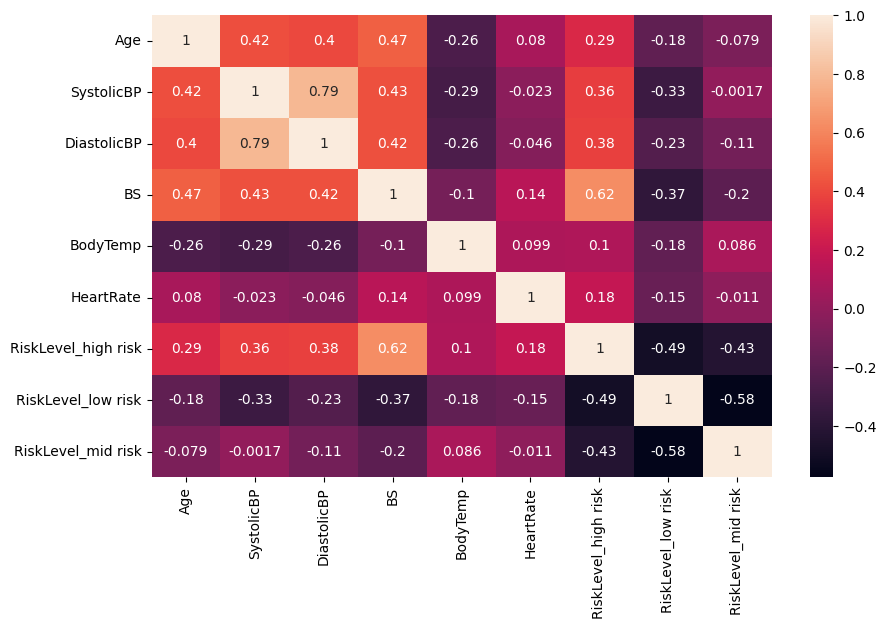

In [7]:
# Correlation heatmap of the variables
corr_features = mhs_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_features, cbar=True, annot=True)

<Axes: >

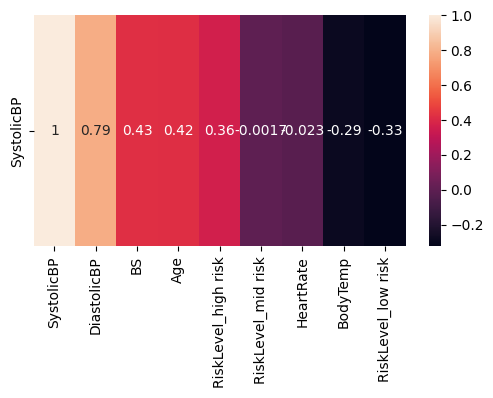

In [8]:
sys_heatmap = corr_features['SystolicBP'].sort_values(ascending=False).to_frame().T
plt.figure(figsize=(6,3))
sns.heatmap(sys_heatmap, cbar=True, annot=True)

As seen from the above, the most correlated feature with `SystolicBP` is `DiastolicBP`, followed by `BS`,`Age`,`RiskLevel_high risk`, and `RiskLevel_low risk`. All the other features have less than 0.3 correlation and so will not be used as exploratory variables

In [9]:
mhs_new = mhs_data.drop(['BodyTemp','HeartRate','RiskLevel_mid risk'], axis=1)

In [10]:
# Divide the data into features and target

features = mhs_new.drop('SystolicBP', axis=1)
target = mhs_new['SystolicBP']

**Split the data to get it ready for building the linear model**

In [11]:
# Import the packages

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
# Split the features into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# We will scale the values in the data to ensure that all the varibles contribute equally to the analysis

# Instantiate the scaler object
scaler = MinMaxScaler()

# Normalize the data
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [13]:
X_train_std

array([[0.33333333, 0.60784314, 0.23076923, 0.        , 0.        ],
       [0.21666667, 0.41176471, 0.06923077, 0.        , 0.        ],
       [0.36666667, 0.80392157, 0.06923077, 0.        , 0.        ],
       ...,
       [0.11666667, 0.2745098 , 0.06923077, 0.        , 0.        ],
       [0.91666667, 0.60784314, 0.69230769, 1.        , 0.        ],
       [0.63333333, 0.80392157, 0.69230769, 1.        , 0.        ]])

**Building the Linear Regression model**

In [14]:
# Instantiate the regression object
reg = LinearRegression()

# Train the model
reg.fit(X_train_std, y_train)

predictions = reg.predict(X_test_std)

print(f'Mean absolute error is {mean_absolute_error(y_test, predictions):.2f}')
print(f'The root mean squared error is {np.sqrt(mean_squared_error(y_test, predictions)):.2f}')
print(f'The accuracy of the model is {r2_score(y_test,predictions)*100:.2f}')

Mean absolute error is 8.58
The root mean squared error is 10.70
The accuracy of the model is 64.60


**Plot the results**

Text(0, 0.5, 'Predicted')

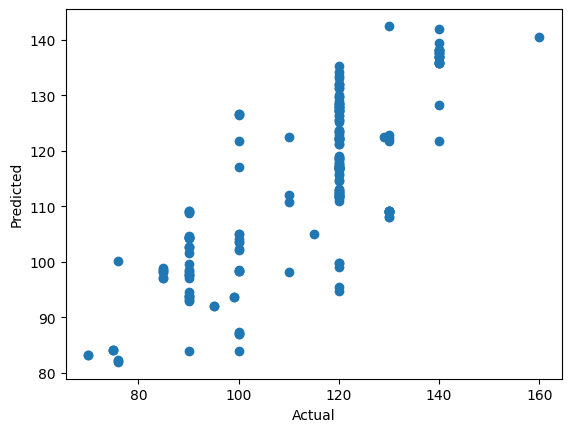

In [15]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')

**A regression plot of the model**

Text(0, 0.5, 'Predicted SystolicBP')

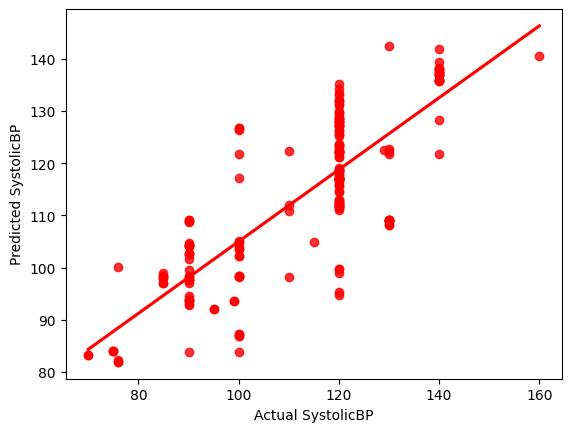

In [16]:
sns.regplot(x=y_test, y=predictions, ci=None, color='red')
plt.xlabel('Actual SystolicBP')
plt.ylabel('Predicted SystolicBP')

**Predicted Values**

In [17]:
predicted_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predictions,'Difference':y_test-predictions})
predicted_df

,Actual Value,Predicted Value,Difference
752,130,109.181454,20.818546
519,140,138.200313,1.799687
210,140,136.962341,3.037659
611,120,122.267966,-2.267966
914,120,111.854110,8.145890
...,...,...,...
370,75,84.099526,-9.099526
381,120,127.222443,-7.222443
780,90,109.101935,-19.101935
760,90,98.302378,-8.302378


Here we see the difference between the Actual values and the predicted values are not consistent across all the values. Some of the predictions are within acceptable range while some are just far apart. This explains the accuracy of the mmodel which is approximately 65%. This tells that the model is performing just above average.

## Question 2: Applying PCA on the dataset to reduce the number of variables with `SystolicBP` as response variable

In [18]:
# Here we choose SystolicBP as the target variable
features_PCA = mhs_data.drop('SystolicBP', axis=1)
target_PCA = mhs_data['SystolicBP']

In [19]:
# Import package
from sklearn.decomposition import PCA

In [20]:
# Standardize the data first before applying PCA

# Instantiaite scaler object
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features_PCA)


pca = PCA(4)
pca_scores = pca.fit_transform(x_scaled)

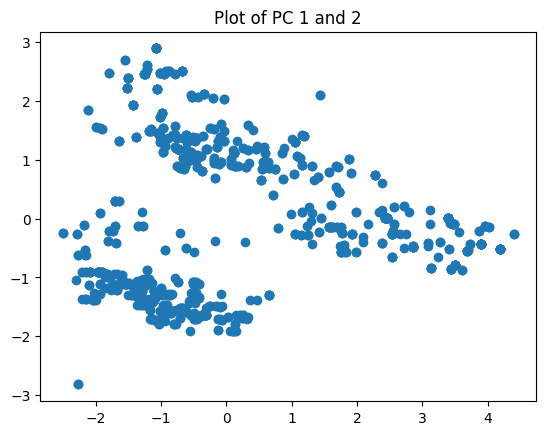

In [21]:
# Visualize pca results
pc1 = pca_scores[:,0]
pc2 = pca_scores[:,1]

plt.scatter(pc1,pc2)
plt.title('Plot of PC 1 and 2')
plt.show()

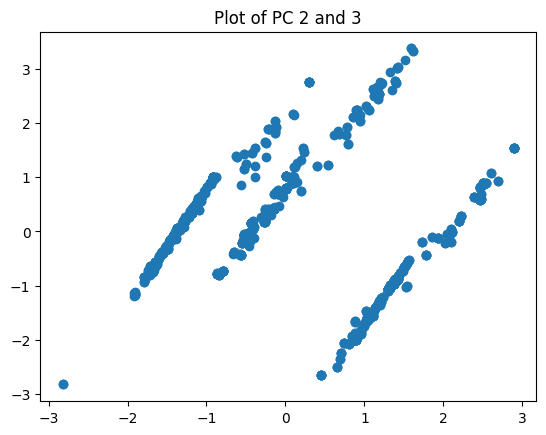

In [22]:
# Visualize pca results
pc2 = pca_scores[:,1]
pc3 = pca_scores[:,2]

plt.scatter(pc2,pc3)
plt.title('Plot of PC 2 and 3')
plt.show()

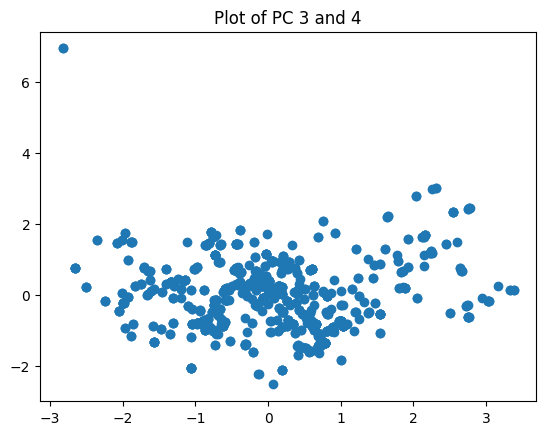

In [23]:
# Visualize pca results
pc3 = pca_scores[:,2]
pc4 = pca_scores[:,3]

plt.scatter(pc3,pc4)
plt.title('Plot of PC 3 and 4')
plt.show()

In [24]:
# Scree plot function

def scree_plot(pca):
    # define percentage contribution of each variance
    
    num_components = len(pca.explained_variance_ratio_)
    
    idx = np.arange(num_components)
    
    values = pca.explained_variance_ratio_
    
    # define graph area
    plt.figure(figsize=(5,6))
    ax = plt.subplot(111)
    cum = np.cumsum(values)
    
    ax.bar(idx, values)
    ax.plot(idx, cum)
    
    # Annotate the bar graphs
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(values[i]*100)[:3])),
                   (idx[i], values[i]),
                   va='bottom', ha='center', fontsize=12)
    
    # setting tick parameters
    ax.xaxis.set_tick_params(width=1)
    ax.yaxis.set_tick_params(width=3, length=7)
    
    # labelling x and y axis
    ax.set_xlabel('Principal Component Values')
    ax.set_ylabel('Variance Explained Percentage')
    plt.title('Scree plot of variance for each principal component')

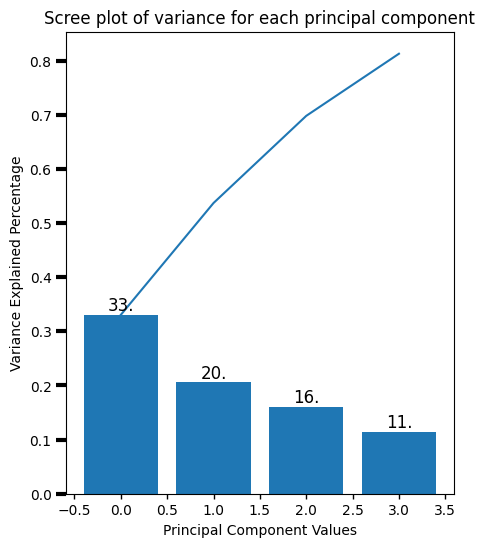

In [25]:
scree_plot(pca)

In [26]:
principal_mhs_df = pd.DataFrame(data = pca_scores, columns= ['PC1','PC2','PC3','PC4'])

In [27]:
principal_mhs_df = pd.concat([principal_mhs_df, pd.DataFrame(target_PCA)], axis=1)

In [28]:
features_PCA.columns

Index(['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel_high risk', 'RiskLevel_low risk', 'RiskLevel_mid risk'],
      dtype='object')

The loadings value will tell us about the descriptor and the scores values will tell about the data samples.
The scores actually corresspond to rows in the dataset so we have 1014 values of scores_pca
Since there are 6 features (minus the target variable i.e `SystolicBP`), we will have 6 loading values, one for each descriptor

In [29]:
# Retrieve the loadings values

loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1','PC2','PC3','PC4'], index=features_PCA.columns)
df_loadings

,PC1,PC2,PC3,PC4
Age,0.398933,-0.125863,-0.289451,-0.257454
DiastolicBP,0.410434,-0.138396,-0.299668,0.167270
BS,0.518966,-0.022803,0.053062,0.026358
BodyTemp,-0.090879,0.388842,0.554044,0.328635
HeartRate,0.134949,0.188818,0.375408,-0.850483
RiskLevel_high risk,0.501919,0.016607,0.372562,0.226733
RiskLevel_low risk,-0.327826,-0.618573,0.116994,-0.121376
RiskLevel_mid risk,-0.131178,0.628273,-0.472457,-0.087064


In [30]:
# Explained variance for each PC
explained_variance = pca.explained_variance_ratio_
percent_variance = np.round(pca.explained_variance_ratio_*100, 2)
print('percent_variance=', percent_variance)

percent_variance= [33.06 20.67 16.1  11.48]


Preparing the Cumulative variance data

In [31]:
# Express the explained variance ratio as a cumulative sum
cumulative_variance = pca.explained_variance_ratio_.cumsum()

pc_df = pd.DataFrame(['PC1','PC2','PC3','PC4'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,PC1,0.330608,0.330608
1,PC2,0.206651,0.537259
2,PC3,0.161037,0.698296
3,PC4,0.114838,0.813133


## Question 3: Relationship between `Age` and `HeartRate`

In [32]:
#Creating an Age Group column to aid in population demographics
bin_ranges = [10,20,30,40,50,60,70]

group_names = ['10-19','20-29','30-39','40-49','50-59','60-70']

mhs_df['Age_Group'] = pd.cut(mhs_df['Age'], bins=bin_ranges, labels=group_names, include_lowest=True, right=False)

<Axes: xlabel='Age_Group'>

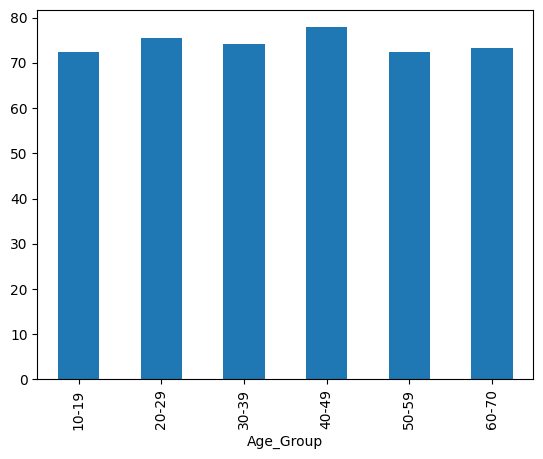

In [33]:
mhs_df.groupby('Age_Group')['HeartRate'].mean().plot.bar()

In [34]:
age_grp_per_heartrate = mhs_df.groupby('Age_Group')['HeartRate'].describe()
age_grp_per_heartrate.reset_index(inplace=True)

In [35]:
age_grp_per_heartrate

,Age_Group,count,mean,std,min,25%,50%,75%,max
0,10-19,279.0,72.455197,8.709787,7.0,70.0,70.0,77.0,86.0
1,20-29,307.0,75.429967,7.437154,60.0,70.0,77.0,80.0,90.0
2,30-39,176.0,74.244318,7.084992,60.0,70.0,76.0,78.0,88.0
3,40-49,114.0,77.824561,8.416425,60.0,70.0,77.0,88.0,90.0
4,50-59,96.0,72.500000,7.611625,60.0,66.0,70.0,77.0,90.0
5,60-70,41.0,73.195122,8.414926,60.0,66.0,76.0,77.0,90.0


Text(0.5, 1.0, 'Mean heart rate per Age Group')

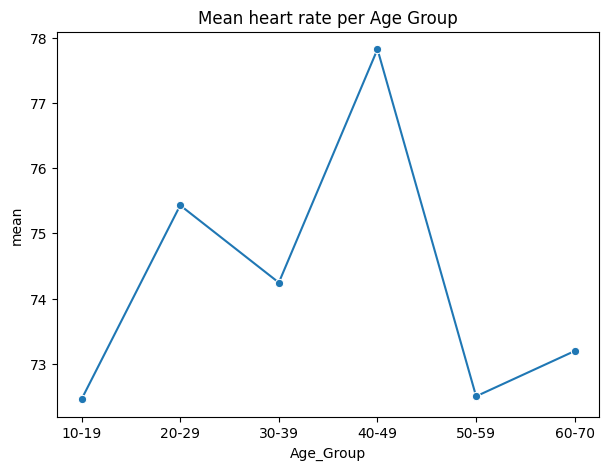

In [36]:
plt.figure(figsize=(7,5))
sns.lineplot(age_grp_per_heartrate, x='Age_Group', y='mean', marker='o').set_title('Mean heart rate per Age Group')

## Question 4:    Association pattern mining between `SystolicBP` and `DiastolicBP`

In [37]:
# Import the packages
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

* Categorise the values in the columns to corresspond to `high`, `normal` or `low` as the case may be.
* Prepare the dataset by isolating the columns `SystolicBP` and `DiastolicBP`
* Then use pandas `get_dummies` method to convert the values into encoded values of 1s and 0s

In [38]:
def label_bp_category(df, col):
    bp_label = []
    if col=='DiastolicBP':
        for row in df[col]:
            if row >= 90:
                bp_label.append('high')
            elif row >= 70 and row < 90:
                bp_label.append('normal')
            elif row < 70:
                bp_label.append('low')
    elif col=='SystolicBP':
        for row in df[col]:
            if row >= 140:
                bp_label.append('high')
            elif row >= 110 and row < 140:
                bp_label.append('normal')
            elif row < 110:
                bp_label.append('low')
    return bp_label

In [39]:
mhs_df['DiastolicBP_label'] = label_bp_category(mhs_df, 'DiastolicBP')
mhs_df['SystolicBP_label'] = label_bp_category(mhs_df, 'SystolicBP')

In [40]:
apriori_df = mhs_df[['SystolicBP_label','DiastolicBP_label']]
df = pd.get_dummies(apriori_df)
df.head()

,SystolicBP_label_high,SystolicBP_label_low,SystolicBP_label_normal,DiastolicBP_label_high,DiastolicBP_label_low,DiastolicBP_label_normal
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,1,0,0,0,1
3,1,0,0,0,0,1
4,0,0,1,0,1,0


In [41]:
len(df)

1014

In [42]:
freq_itemset = apriori(df, min_support=0.05, use_colnames=True)
freq_itemset

C:\Users\Abisola\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.128205,(SystolicBP_label_high)
1,0.339250,(SystolicBP_label_low)
2,0.532544,(SystolicBP_label_normal)
3,0.272189,(DiastolicBP_label_high)
4,0.316568,(DiastolicBP_label_low)
5,0.411243,(DiastolicBP_label_normal)
6,0.115385,"(DiastolicBP_label_high, SystolicBP_label_high)"
7,0.266272,"(SystolicBP_label_low, DiastolicBP_label_low)"
8,0.063116,"(DiastolicBP_label_normal, SystolicBP_label_low)"
9,0.146943,"(DiastolicBP_label_high, SystolicBP_label_normal)"


In [43]:
rules = association_rules(freq_itemset, metric='lift', min_threshold=0.5)
rules['antecedents_length'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequents_length'] = rules['consequents'].apply(lambda x: len(x))
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
0,(DiastolicBP_label_high),(SystolicBP_label_high),0.272189,0.128205,0.115385,0.423913,3.306522,0.080489,1.513304,1,1
1,(SystolicBP_label_high),(DiastolicBP_label_high),0.128205,0.272189,0.115385,0.900000,3.306522,0.080489,7.278107,1,1
2,(SystolicBP_label_low),(DiastolicBP_label_low),0.339250,0.316568,0.266272,0.784884,2.479352,0.158876,3.177035,1,1
3,(DiastolicBP_label_low),(SystolicBP_label_low),0.316568,0.339250,0.266272,0.841121,2.479352,0.158876,4.158835,1,1
6,(DiastolicBP_label_normal),(SystolicBP_label_normal),0.411243,0.532544,0.335306,0.815348,1.531042,0.116301,2.531545,1,1
7,(SystolicBP_label_normal),(DiastolicBP_label_normal),0.532544,0.411243,0.335306,0.629630,1.531042,0.116301,1.589645,1,1
4,(DiastolicBP_label_high),(SystolicBP_label_normal),0.272189,0.532544,0.146943,0.539855,1.013728,0.001990,1.015888,1,1
5,(SystolicBP_label_normal),(DiastolicBP_label_high),0.532544,0.272189,0.146943,0.275926,1.013728,0.001990,1.005160,1,1


In [44]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
1,(SystolicBP_label_high),(DiastolicBP_label_high),0.128205,0.272189,0.115385,0.900000,3.306522,0.080489,7.278107,1,1
3,(DiastolicBP_label_low),(SystolicBP_label_low),0.316568,0.339250,0.266272,0.841121,2.479352,0.158876,4.158835,1,1
6,(DiastolicBP_label_normal),(SystolicBP_label_normal),0.411243,0.532544,0.335306,0.815348,1.531042,0.116301,2.531545,1,1
2,(SystolicBP_label_low),(DiastolicBP_label_low),0.339250,0.316568,0.266272,0.784884,2.479352,0.158876,3.177035,1,1
7,(SystolicBP_label_normal),(DiastolicBP_label_normal),0.532544,0.411243,0.335306,0.629630,1.531042,0.116301,1.589645,1,1
4,(DiastolicBP_label_high),(SystolicBP_label_normal),0.272189,0.532544,0.146943,0.539855,1.013728,0.001990,1.015888,1,1
0,(DiastolicBP_label_high),(SystolicBP_label_high),0.272189,0.128205,0.115385,0.423913,3.306522,0.080489,1.513304,1,1
5,(SystolicBP_label_normal),(DiastolicBP_label_high),0.532544,0.272189,0.146943,0.275926,1.013728,0.001990,1.005160,1,1


In [45]:
# Selecting rules where the antecedent is diastolicbp and consequent is systolicbp for high/high, normal/normal and low/low
rules.loc[[1,6,2]]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
1,(SystolicBP_label_high),(DiastolicBP_label_high),0.128205,0.272189,0.115385,0.900000,3.306522,0.080489,7.278107,1,1
6,(DiastolicBP_label_normal),(SystolicBP_label_normal),0.411243,0.532544,0.335306,0.815348,1.531042,0.116301,2.531545,1,1
2,(SystolicBP_label_low),(DiastolicBP_label_low),0.339250,0.316568,0.266272,0.784884,2.479352,0.158876,3.177035,1,1


## Question 5:  Clusters of patients with similar Systolic BP

In [46]:
# Import the packages 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

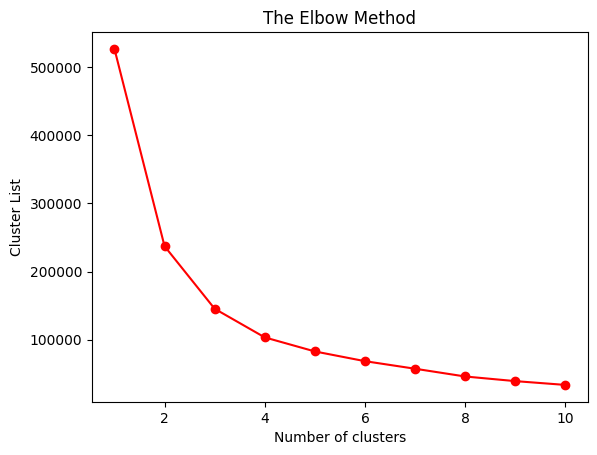

In [47]:
# Using the Elbow method to determine the appropriate number of clusters
X = mhs_df[['Age','SystolicBP']]
cluster_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 0)
    kmeans.fit(X)
    cluster_list.append(kmeans.inertia_)
plt.plot(range(1, 11), cluster_list, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster List')
plt.show()

C:\Users\Abisola\AppData\Local\Temp\ipykernel_15664\880152943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = labels


Silhouette Score is: 0.5253988090843971
label
0    124.721557
1     90.950867
Name: SystolicBP, dtype: float64


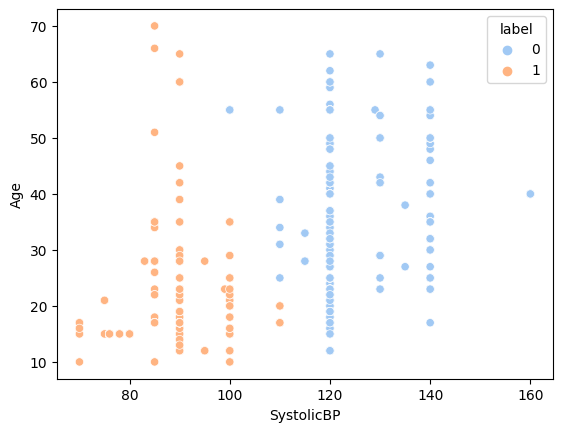

In [48]:
# Instantiate the cluster object 
kmeans = KMeans(n_clusters=2)

# Build cluster labels
kmeans.fit(X)
labels = kmeans.fit_predict(X)

X['label'] = labels

print(f'Silhouette Score is: {silhouette_score(X, labels)}')


sns.scatterplot(X, x='SystolicBP', y='Age', hue = 'label',
               palette='pastel')

# Display the mean SystolicBP for each cluster label
print(X.groupby('label')['SystolicBP'].mean())

## Question 6: Correlation between `Age` and `SystolicBP`.

In [49]:
corr_age_bp = mhs_df.drop(['DiastolicBP','BS','BodyTemp','HeartRate','RiskLevel'], axis=1).corr()
corr_age_bp['SystolicBP'].sort_values(ascending=False).to_frame().T

C:\Users\Abisola\AppData\Local\Temp\ipykernel_15664\1097275006.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_age_bp = mhs_df.drop(['DiastolicBP','BS','BodyTemp','HeartRate','RiskLevel'], axis=1).corr()


,SystolicBP,Age
SystolicBP,1.0,0.416045


The correlation between Age and SystolicBP is approximately 0.42

<Axes: >

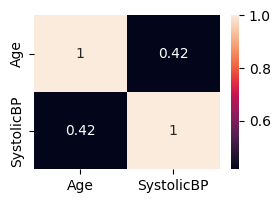

In [50]:
plt.figure(figsize=(3,2))
sns.heatmap(corr_age_bp, cbar=True, annot=True)

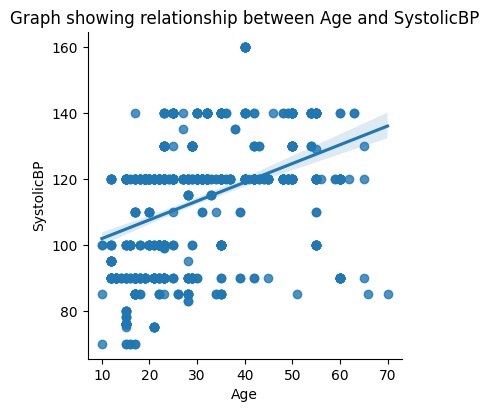

In [51]:
sns.lmplot(mhs_df, x='Age', y='SystolicBP', 
                     height=4, aspect=1).set(title ='Graph showing relationship between Age and SystolicBP')